$\newcommand{L}[1]{\| #1 \|}\newcommand{VL}[1]{\L{ \vec{#1} }}\newcommand{R}[1]{\operatorname{Re}\,(#1)}\newcommand{I}[1]{\operatorname{Im}\, (#1)}$

<!-- vim: ft=rst -->
## Basic linear modeling

In [1]:
%matplotlib inline

In this exercise we will run a simple regression on all voxels in a 4D
FMRI image `ds114_sub009_t2r1.nii`:

In [2]:
#: Import some standard librares
import numpy as np
# Print to 4 DP
np.set_printoptions(precision=4)
import numpy.linalg as npl
import matplotlib.pyplot as plt
# Set default imshow parameters
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [3]:
#: Load the image as an image object
import nibabel as nib
img = nib.load('ds114_sub009_t2r1.nii')

In [4]:
#: Load the image data as an array
# Drop the first 4 3D volumes from the array
# (We already saw that these were abnormal)
data = img.get_data()[..., 4:]

We make the design matrix from the convolved regressor from
Convolving with the hemodyamic response function:

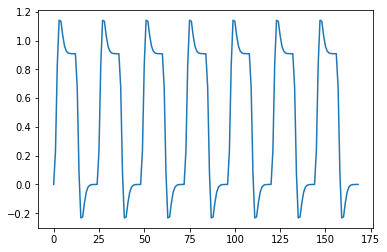

In [5]:
#- Load the pre-written convolved time course
#- Knock off the first four elements
convolved = np.loadtxt('ds114_sub009_t2r1_conv.txt')[4:]
plt.plot(convolved)

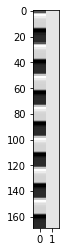

In [6]:
#- Compile the design matrix
#- First column is convolved regressor
#- Second column all ones
#- Hint: investigate "aspect" keyword to ``plt.imshow`` for a nice
#- looking image.
design = np.ones((len(convolved), 2))
design[:, 0] = convolved
plt.imshow(design, aspect=0.1)

In [7]:
#- Reshape the 4D data to voxel by time 2D
#- Transpose to give time by voxel 2D
#- Calculate the pseudoinverse of the design
#- Apply to time by voxel array to get betas
data_2d = np.reshape(data, (-1, data.shape[-1]))
betas = npl.pinv(design).dot(data_2d.T)
betas.shape

(2, 122880)

In [8]:
#- Transpose betas to give voxels by 2 array
#- Reshape into 4D array, with same 3D shape as original data,
#- last dimension length 2
betas_4d = np.reshape(betas.T, img.shape[:-1] + (-1,))

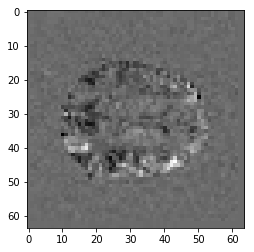

In [9]:
#- Show the middle slice from the first beta volume
plt.imshow(betas_4d[:, :, 14, 0], interpolation='nearest', cmap='gray')

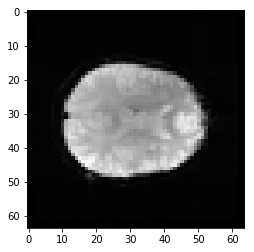

In [10]:
#- Show the middle slice from the second beta volume
plt.imshow(betas_4d[:, :, 14, 1], interpolation='nearest', cmap='gray')

<!-- vim:ft=rst -->
<!-- Course -->
<!-- BIC -->
<!-- Python distributions -->
<!-- Version control -->
<!-- Editors -->
<!-- Python and common libraries -->
<!-- IPython -->
<!-- Virtualenv and helpers -->
<!-- Pypi and packaging -->
<!-- Mac development -->
<!-- Windows development -->
<!-- Nipy and friends -->
<!-- FMRI datasets -->
<!-- Languages -->
<!-- Imaging software -->
<!-- Installation -->
<!-- Tutorials -->
<!-- MB tutorials -->
<!-- Ideas -->
<!-- Psych-214 -->
<!-- People -->
<!-- Licenses -->
<!-- Neuroimaging stuff -->
<!-- OpenFMRI projects -->
<!-- Unix -->
<!-- Substitutions -->